In [4]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(1, '../src')
from utils.accuracy import *
from utils.dm_test import dm_test

In [5]:
def dm_table(y_hats, method_1, method_2, crit="MAPE"):
    firm_list = y_hats.index.get_level_values(0).unique()
    firm_list = list(firm_list)

    def dm_test_i(firm, crit=crit):
        firm_slice = y_hats.loc[pd.IndexSlice[firm, :, :], :]
        return dm_test(firm_slice["y_test"], firm_slice[method_1], firm_slice[method_2], h=1, crit=crit)

    dm_results = list(map(dm_test_i, firm_list))

    dm = pd.DataFrame(dm_results, index=firm_list)
    # ac_i = pd.read_csv("../assets/y_hats/accuracy_table_i.csv", index_col=[0, 1])
    # crit_i = ac_i.loc[pd.IndexSlice[:, crit], [method_1, method_2]]
    # crit_i.index = firm_list
    # dm = pd.concat([dm, crit_i], axis=1)
    def sig_level(x):
        sig_level = None
        if x <= 0.01:
            sig_level = "0.01"
        elif (0.01 < x) & (x <= 0.05):
            sig_level = "0.05"
        elif (0.05 < x) & (x <= 0.10):
            sig_level = "0.10"
        else:
            sig_level = "not stat sig"
        return sig_level
    dm["sig_level"] = dm["p_value"].apply(sig_level)
    return dm

In [33]:
def dm_stats_hist(method_1, method_2, y_hats, bins=35):
    dm_mape = dm_table(y_hats, method_1, method_2, crit="MAPE")

    # pivot and plot
    dm_mape.pivot(columns="sig_level", values="DM").plot.hist(bins=bins, figsize=(16, 9))
    plt.xlabel("DM stat")
    plt.ylabel("firm count")
    plt.legend()
    plt.title("DM-test (" + str(len(dm_mape)) + " firms) results: (1) " + method_1 + " vs. (2) " + method_2)
    plt.show()

    p_1n = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] < 0).sum()
    p1_5n = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] < 0).sum()
    p5_10n = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] < 0).sum()
    p10_n = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] < 0).sum()
    p10_p = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] > 0).sum()
    p5_10p = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] > 0).sum()
    p1_5p = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] > 0).sum()
    p_1p = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] > 0).sum()
    print(p_1n, p1_5n, p5_10n, p10_n, "|", p10_p, p5_10p, p1_5p, p_1p)

In [22]:
a = pd.read_csv("../assets/y_hats/accuracy_table.csv", index_col=[0])
a

,Max_error,Max_percentage_error,MAE,MAPE,MSPE,MAPE-UB,MSPE-UB,Large_error_rate
y_test,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
y_hat_rw,1989.290000,5895.000000,37.770604,4.379599,7.460224e+03,0.579793,0.467193,0.317402
y_hat_sarima_br,17667.440089,88978.127205,37.669625,10.166409,6.479149e+05,0.520454,0.402909,0.258497
y_hat_sarima_f,3611.477871,2068.166620,33.807154,2.804919,1.209350e+03,0.520714,0.405572,0.265686
y_hat_sarima_g,3370.115229,34626.006762,38.409683,6.304809,9.978110e+04,0.527105,0.415342,0.279739
y_hat_srw,2685.300000,1946.000000,32.428945,2.700887,9.912652e+02,0.522570,0.408626,0.261356
y_hat_uen_i_tuned_simple,3306.700499,21034.826351,35.997537,4.576555,3.741609e+04,0.551486,0.424892,0.239134
y_hat_ul1_i_tuned_fine,2627.983935,21034.826090,34.872308,4.343510,3.709087e+04,0.555476,0.428964,0.236438
y_hat_ul1_i_tuned_simple,4322.802063,21034.826119,36.642108,4.651040,3.743304e+04,0.559925,0.434411,0.243709
y_hat_ul2_i_tuned_simple,6374.325185,21034.826089,42.734390,5.460706,3.786513e+04,0.540097,0.425545,0.284722


In [23]:
y_hats_all = pd.read_csv("../assets/y_hats/y_hats_all.csv", index_col=[0, 1, 2])
model_list = [
    "y_test",
    'y_hat_rw', 
    'y_hat_srw', 
    'y_hat_sarima_f', 
    'y_hat_sarima_g', 
    'y_hat_sarima_br',
    'y_hat_mlm1', 
    'y_hat_mlm2',
    'y_hat_mlm4',
    'y_hat_ul1_i_tuned_simple',
    'y_hat_ul2_i_tuned_simple',
    'y_hat_uen_i_tuned_simple',        
    'y_hat_umlp',
    'y_hat_ml1_i_tuned_simple',
    'y_hat_ml2_i_tuned_simple',
    'y_hat_men_i_tuned_simple',
    'y_hat_mraf_i_tuned_simple',
    'y_hat_mmlp'
    ]
y_hats_all = y_hats_all[model_list]
y_hats_all

y_test    y_hat_rw   y_hat_srw  y_hat_sarima_f  \
企業名   会計年度 四半期                                                       
あらた   2018 Q1   105.420000   69.340000  121.170000      122.449521   
           Q2    90.440000  105.420000   90.920000       79.998967   
           Q3   106.240000   90.440000  119.880000      119.551232   
           Q4    99.220000  106.240000   69.340000       59.996949   
      2019 Q1   116.850000   99.220000  105.420000      125.133255   
...                    ...         ...         ...             ...   
ｅＢＡＳＥ 2019 Q4    18.657982    5.290000   36.976728       36.300485   
      2020 Q1     2.010000   18.657982    3.090000       -0.020788   
           Q2     3.810000    2.010000   11.840000       11.637899   
           Q3     3.070000    3.810000    5.290000        3.736002   
           Q4     9.989365    3.070000   18.657982       18.235485   

                y_hat_sarima_g  y_hat_sarima_br  y_hat_mlm1   y_hat_mlm2  \
企業名   会計年度 四半期                                                             
あらた   2018 Q1       130.595361       122.565740  142.213501   113.490222   
           Q2        94.544504        79.897110   92.463386   157.027451   
           Q3       119.287623       119.386680  118.419913    84.545219   
           Q4        65.424073        60.222049   72.589673   111.753597   
      2019 Q1       126.004465       127.203963   98.036624   126.181789   
...                        ...              ...         ...          ...   
ｅＢＡＳＥ 2019 Q4        88.758959        51.406785  -82.273856  1361.294861   
      2020 Q1      -980.636406       -68.232333  161.435880   -96.581389   
           Q2      -201.877901        19.227708 -129.129435   638.576354   
           Q3      -249.404402      -317.707192  -55.248900    47.373257   
           Q4        72.472296        34.835646    8.203400    55.521833   

                y_hat_mlm4  y_hat_ul1_i_tuned_simple  \
企業名   会計年度 四半期                                         
あらた   2018 Q1   263.859095                114.921869   
           Q2   186.013135                 85.174564   
           Q3   -90.797436                108.396646   
           Q4    43.663635                 93.029132   
      2019 Q1   137.056577                107.530710   
...                    ...                       ...   
ｅＢＡＳＥ 2019 Q4    31.609783                133.635183   
      2020 Q1    -8.705827                 51.945503   
           Q2   -12.323521                 21.310432   
           Q3    14.509884                 20.893796   
           Q4     8.147153                  6.097895   

                y_hat_ul2_i_tuned_simple  y_hat_uen_i_tuned_simple  \
企業名   会計年度 四半期                                                       
あらた   2018 Q1                 126.523471                 91.794110   
           Q2                  91.008450                 85.372422   
           Q3                 117.662513                 92.288894   
           Q4                  95.430889                 86.819024   
      2019 Q1                 112.568429                 96.812369   
...                                  ...                       ...   
ｅＢＡＳＥ 2019 Q4                 133.635183                133.635183   
      2020 Q1                  51.945503                 51.945503   
           Q2                  21.310432                 21.310432   
           Q3                  20.893796                 20.893796   
           Q4                   6.097895                  6.097895   

                y_hat_umlp  y_hat_ml1_i_tuned_simple  \
企業名   会計年度 四半期                                         
あらた   2018 Q1    111.25781                 89.690620   
           Q2     84.75139                 76.539459   
           Q3    114.48496                 92.859737   
           Q4     79.35591                 69.808968   
      2019 Q1    113.64266                117.066485   
...                    ...                       ...   
ｅＢＡＳＥ 2019 Q4   -138.77140      

In [24]:
dm_mape = dm_table(method_1="y_hat_rw", method_2="y_hat_sarima_br", y_hats=y_hats_all)
dm_mape

,DM,p_value,sig_level
あらた,1.876023,0.087422,0.10
いすゞ自動車,1.987333,0.072356,0.10
いなげや,1.642191,0.128802,not stat sig
かどや製油,1.595921,0.138813,not stat sig
きんでん,2.164136,0.053319,0.10
...,...,...,...
ＵＡＣＪ,1.990488,0.071967,0.10
ＷＤＢホールディングス,-4.206714,0.001469,0.01
ＷＯＷＯＷ,-1.569295,0.144878,not stat sig
ＺＯＺＯ,-0.628966,0.542212,not stat sig


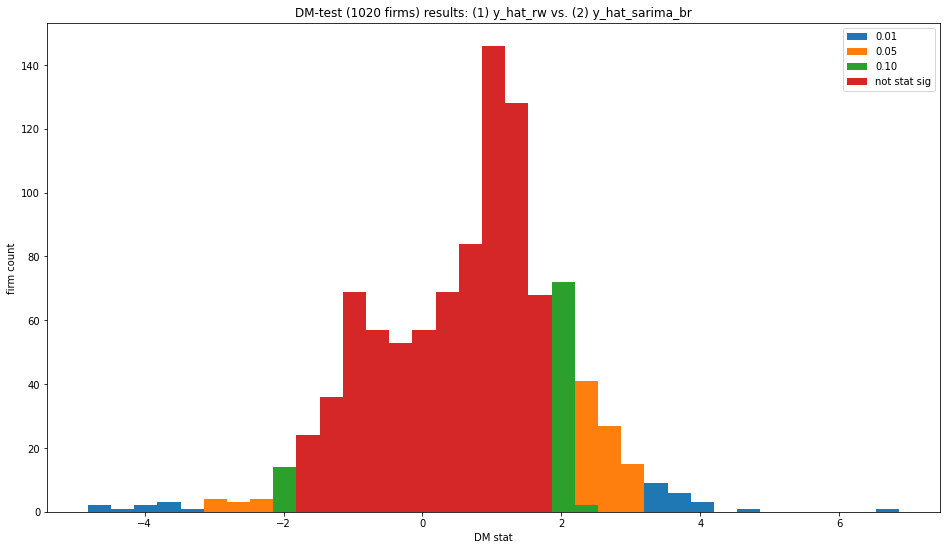

9 11 15 262 | 529 90 83 21


In [34]:
dm_stats_hist(method_1="y_hat_rw", method_2="y_hat_sarima_br", y_hats=y_hats_all, bins=35)

In [35]:
def dm_integrated_table(method_1, m2_list, y_hats):
    # Create Table
    dm_test_p = pd.DataFrame()
    l = []
    for i in m2_list:
        method_2 = i
        pair = "(1) " + method_1 + " vs " + "(2) " + method_2

        # DM score for each firm
        dm_mape = dm_table(method_1=method_1, method_2=method_2, y_hats=y_hats)
        dm_mape["pair"] = pair
        dm_test_p = pd.concat([dm_test_p, dm_mape])

        # count firm for each statistic significance level
        p_1n = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] < 0).sum()
        p_5n = (dm_mape[dm_mape["p_value"] <= 0.050]["DM"] < 0).sum()
        p_10n = (dm_mape[dm_mape["p_value"] <= 0.100]["DM"] < 0).sum()
        # p_n = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] < 0).sum()
        # p_p = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] > 0).sum()
        p_10p = (dm_mape[dm_mape["p_value"] <= 0.100]["DM"] > 0).sum()
        p_5p = (dm_mape[dm_mape["p_value"] <= 0.050]["DM"] > 0).sum()
        p_1p = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] > 0).sum()
        # print(p_1n, p_5n, p_10n, p_n, "|", p_p, p_10p, p_5p, p_1p)
        # print(p_1n, p_5n, p_10n, "|", p_10p, p_5p, p_1p)
        l.append([pair, p_1n, p_5n, p_10n, p_10p, p_5p, p_1p])

    dm_test_p = dm_test_p.reset_index().set_index(["pair", "index"])

    dm_test_p_count = pd.DataFrame(l, columns=["pair", "p_1n", "p_5n", "p_10n", "p_10p", "p_5p", "p_1p"])
    dm_test_p_count = dm_test_p_count.set_index(["pair"])

    return dm_test_p, dm_test_p_count

In [38]:
# m1 = "y_hat_rw"
m1 = "y_hat_sarima_br"
# m1 = "y_hat_ml1_i_tuned_simple"
dm_test_p, dm_test_p_count = dm_integrated_table(m1, y_hats_all.columns, y_hats_all)
dm_test_p.to_csv("../assets/DM_test_result/dm_test_p_" + m1 + ".csv")
dm_test_p_count.to_csv("../assets/DM_test_result/dm_test_p_count_" + m1 + ".csv")

/mnt/d/0ngoing/thesis/repo/notebooks/../src/utils/dm_test.py:169: RuntimeWarning: divide by zero encountered in double_scalars
  DM_stat=V_d**(-0.5)*mean_d
/mnt/d/0ngoing/thesis/repo/notebooks/../src/utils/dm_test.py:169: RuntimeWarning: invalid value encountered in double_scalars
  DM_stat=V_d**(-0.5)*mean_d


In [ ]:
# dm_test_p

In [132]:
# dm_test_p_count

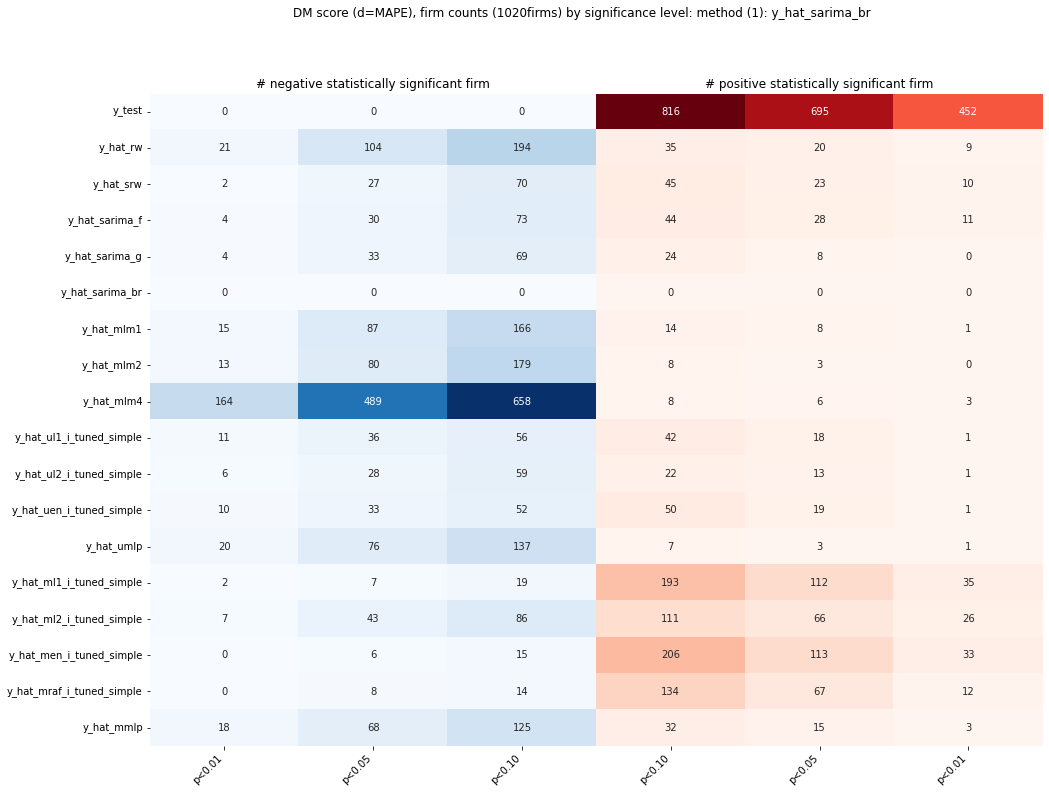

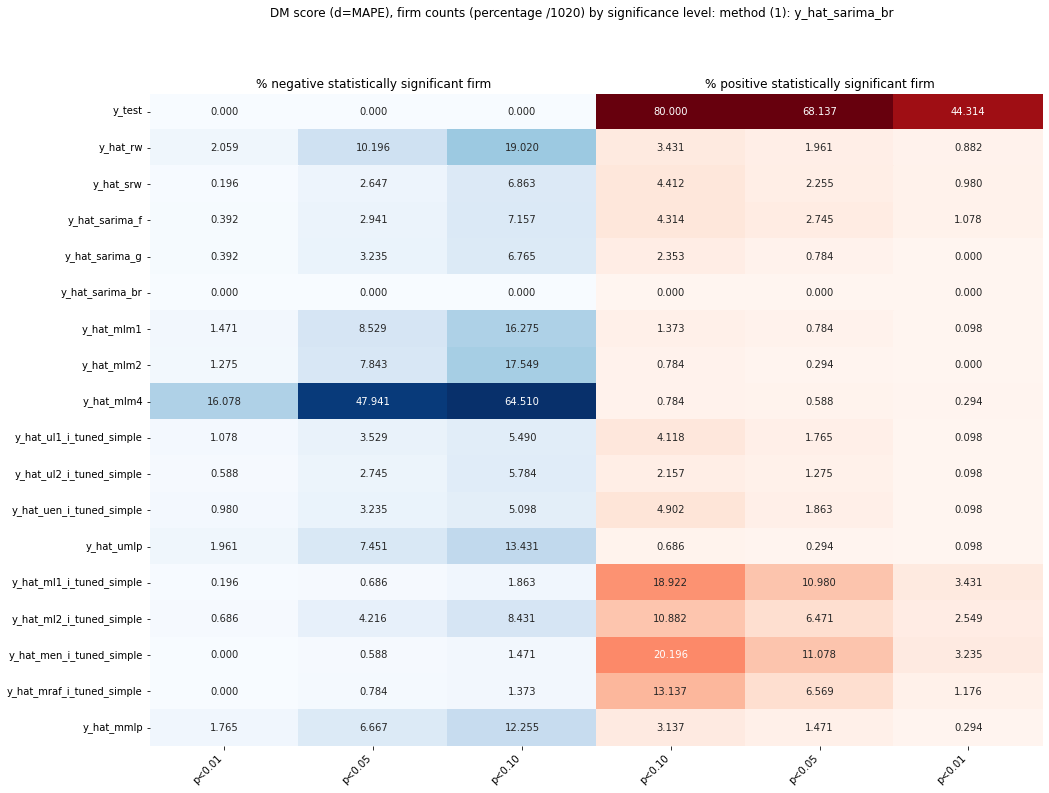

In [39]:
num_firm = len(y_hats_all.index.get_level_values(0).unique())

# plot count heatmap 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))#, dpi=300)

sns.heatmap(dm_test_p_count[["p_1n", "p_5n", "p_10n"]].values, cmap='Blues', ax=axs[0], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, cbar_kws={})
sns.heatmap(dm_test_p_count[["p_10p", "p_5p", "p_1p"]].values, cmap='Reds', ax=axs[1], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=False)

fig.suptitle("DM score (d=MAPE), firm counts (" + str(num_firm) + "firms) by significance level: method (1): " + m1)
axs[0].set_title("# negative statistically significant firm")
axs[0].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"], rotation=45, ha='right')
axs[1].set_title("# positive statistically significant firm")
axs[1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"], rotation=45, ha='right')

yticks = [x.split()[-1] for x in dm_test_p_count.index]
axs[0].set_yticklabels(labels=yticks, rotation=0, ha='right')

fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

# plot count (percentage) heatmap 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))#, dpi=300)

sns.heatmap(dm_test_p_count[["p_1n", "p_5n", "p_10n"]].values * (1/num_firm) * 100, cmap='Blues', ax=axs[0], vmax=50, vmin=0, annot=True, fmt=".3f", cbar=False, cbar_kws={})
sns.heatmap(dm_test_p_count[["p_10p", "p_5p", "p_1p"]].values * (1/num_firm) * 100, cmap='Reds', ax=axs[1], vmax=50, vmin=0, annot=True, fmt=".3f", cbar=False, yticklabels=False)

fig.suptitle("DM score (d=MAPE), firm counts (percentage /" + str(num_firm) + ") by significance level: method (1): " + m1)
axs[0].set_title("% negative statistically significant firm")
axs[0].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"], rotation=45, ha='right')
axs[1].set_title("% positive statistically significant firm")
axs[1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"], rotation=45, ha='right')

yticks = [x.split()[-1] for x in dm_test_p_count.index]
axs[0].set_yticklabels(labels=yticks, rotation=0, ha='right')

fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

# IBES

In [40]:
a_ibes = pd.read_csv("../assets/y_hats/accuracy_table_vsibes.csv", index_col=[0])
a_ibes

,Max_error,Max_percentage_error,MAE,MAPE,MSPE,MAPE-UB,MSPE-UB,Large_error_rate
y_test,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
y_hat_rw,746.770000,154.375000,43.865721,1.768051,51.302715,0.531672,0.415056,0.268519
y_hat_sarima_br,610.800235,226.120325,37.719197,1.660751,80.739667,0.491616,0.374485,0.232407
y_hat_sarima_f,665.312362,203.446576,39.701818,1.785884,79.444919,0.493772,0.380382,0.250926
y_hat_sarima_g,535.510149,278.567590,41.148192,2.391876,158.954911,0.511981,0.399451,0.272222
y_hat_srw,754.500000,136.692810,40.946033,1.675048,52.410885,0.502190,0.387810,0.261111
y_hat_uen_i_tuned_simple,630.692138,463.766149,36.179464,1.619775,213.471556,0.503270,0.374634,0.223148
y_hat_ul1_i_tuned_fine,651.257155,463.766149,37.505112,1.608900,213.347072,0.511903,0.384084,0.229630
y_hat_ul1_i_tuned_simple,630.692138,463.766149,36.523096,1.645407,213.816469,0.508587,0.380715,0.230556
y_hat_ul2_i_tuned_simple,729.792628,508.282636,39.966104,1.900471,259.143656,0.506170,0.386570,0.256481


In [49]:
y_hats_all_vsibes = pd.read_csv("../assets/y_hats/y_hats_all_vsibes.csv", index_col=[0, 1, 2])
model_list = [
    "y_test",
    'y_hat_rw', 
    'y_hat_srw', 
    'y_hat_sarima_f', 
    'y_hat_sarima_g', 
    'y_hat_sarima_br',
    'y_hat_mlm1', 
    'y_hat_mlm2',
    'y_hat_mlm4',
    'y_hat_ul1_i_tuned_simple',
    'y_hat_ul2_i_tuned_simple',
    'y_hat_uen_i_tuned_simple',        
    'y_hat_umlp',
    'y_hat_ml1_i_tuned_simple',
    'y_hat_ml2_i_tuned_simple',
    'y_hat_men_i_tuned_simple',
    'y_hat_mraf_i_tuned_simple',
    'y_hat_mmlp',
    'y_hat_ibes'
    ]
y_hats_all_vsibes = y_hats_all_vsibes[model_list]
y_hats_all_vsibes

y_test  y_hat_rw  y_hat_srw  y_hat_sarima_f  \
企業名    会計年度 四半期                                                   
いすゞ自動車 2018 Q1   48.380000     27.74      41.69       39.930566   
            Q2   24.150000     48.38      25.17       28.002100   
            Q3   50.860000     24.15      39.57       39.095560   
            Q4   26.430000     50.86      27.74       32.019464   
       2019 Q1   37.130000     26.43      48.38       47.922773   
...                    ...       ...        ...             ...   
ＴＯＷＡ   2019 Q4   11.580000     11.21      13.47       25.432088   
       2020 Q1    8.260000     11.58     -19.92      -20.795096   
            Q2   27.300000      8.26      11.87       23.338850   
            Q3   35.290000     27.30      11.21       18.455527   
            Q4   35.707105     35.29      11.58       23.366923   

                 y_hat_sarima_g  y_hat_sarima_br  y_hat_mlm1  y_hat_mlm2  \
企業名    会計年度 四半期                                                            
いすゞ自動車 2018 Q1        36.294894        33.194516   39.551685   19.631389   
            Q2        29.226981        28.366444   22.465440   27.054626   
            Q3        41.291053        38.824756   38.924409   44.978070   
            Q4        41.555242        36.040824   35.405198   30.287266   
       2019 Q1        47.508122        43.788193   60.094518   38.967565   
...                         ...              ...         ...         ...   
ＴＯＷＡ   2019 Q4         6.516588        20.687856   19.581703   11.549762   
       2020 Q1         1.010510         6.524577   31.262841   23.935557   
            Q2        16.411733        22.013448   10.540398   17.206629   
            Q3        10.216570        12.649111   32.023570   21.461350   
            Q4        32.204562        29.574206   29.127981   39.860271   

                 y_hat_mlm4  y_hat_ul1_i_tuned_simple  \
企業名    会計年度 四半期                                         
いすゞ自動車 2018 Q1   -48.088072                 22.903221   
            Q2    10.090125                 23.555935   
            Q3    -5.821929                 25.425477   
            Q4    47.933502                 25.164969   
       2019 Q1    22.774413                 28.102749   
...                     ...                       ...   
ＴＯＷＡ   2019 Q4     9.233298                 23.975295   
       2020 Q1    37.421219                 15.551147   
            Q2   -15.905929                 13.142713   
            Q3    21.536398                 19.186618   
            Q4    46.547376                 28.777520   

                 y_hat_ul2_i_tuned_simple  y_hat_uen_i_tuned_simple  \
企業名    会計年度 四半期                                                       
いすゞ自動車 2018 Q1                  32.399487                 22.903221   
            Q2                  33.581439                 23.555935   
            Q3                  34.983208                 25.425477   
            Q4                  31.301852                 25.164969   
       2019 Q1                  44.562692                 28.102749   
...                                   ...                       ...   
ＴＯＷＡ   2019 Q4                  23.986382                 20.743279   
       2020 Q1                  16.485428                 16.115858   
            Q2                  13.276477                 13.583803   
            Q3                  19.310222                 18.402950   
            Q4                  28.977377                 25.663370   

                 y_hat_umlp  y_hat_ml1_i_tuned_simple  \
企業名    会計年度 四半期                                         
いすゞ自動車 2018 Q1    25.910357                 34.756859   
            Q2    26.813747                 34.935023   
            Q3    40.185104                 44.914890   
            Q4    22.757215                 38.268295   
       2019 Q1    39.468372                 41.573212   
...                     ...                       ...   
ＴＯＷＡ   2019 Q4    35.449900          

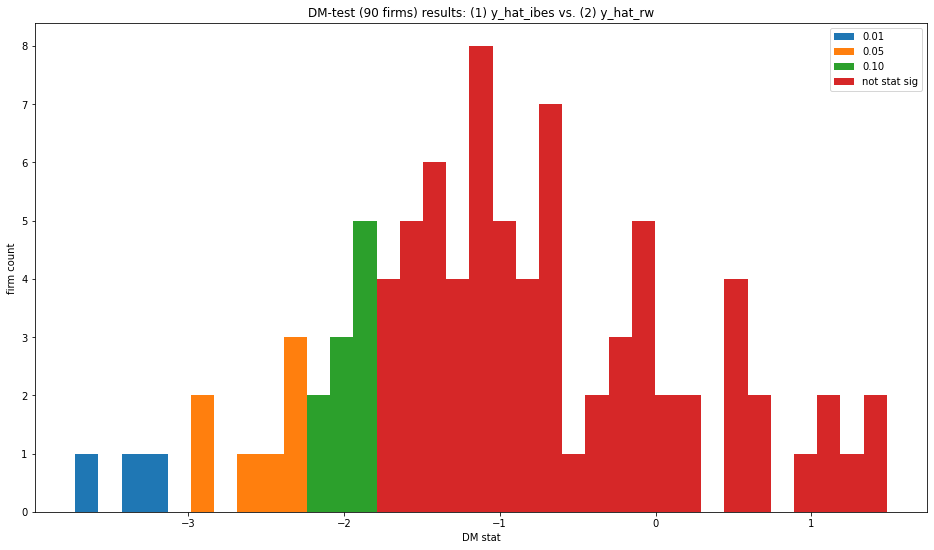

3 7 10 54 | 16 0 0 0


In [50]:
dm_stats_hist(method_2="y_hat_rw", method_1="y_hat_ibes", y_hats=y_hats_all_vsibes)

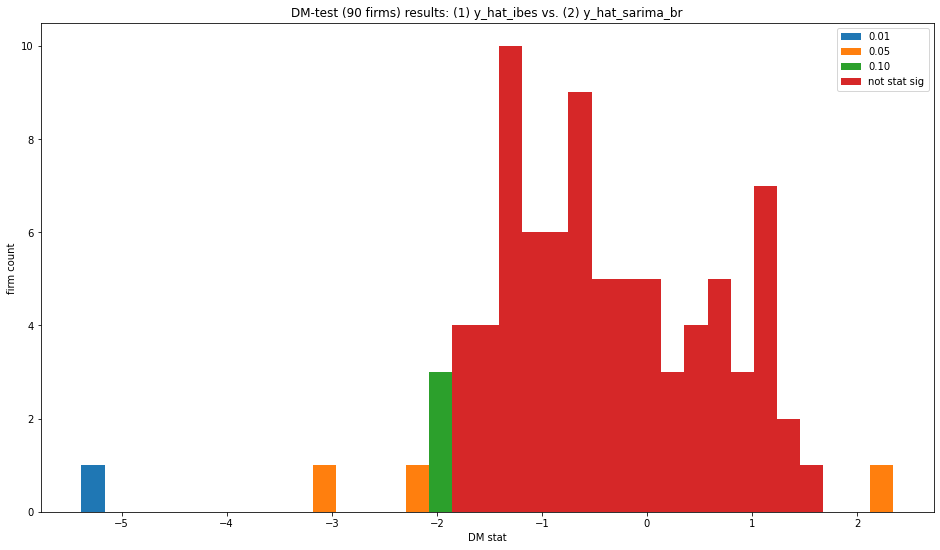

2 2 6 52 | 27 0 1 0


In [51]:
dm_stats_hist(method_2="y_hat_sarima_br", method_1="y_hat_ibes", y_hats=y_hats_all_vsibes)

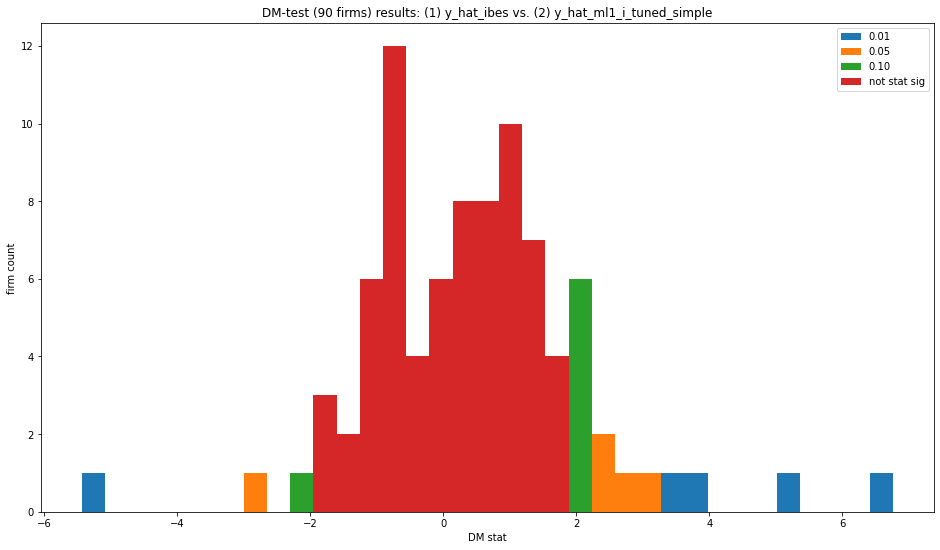

1 2 1 31 | 39 8 4 4


In [52]:
dm_stats_hist(method_2="y_hat_ml1_i_tuned_simple", method_1="y_hat_ibes", y_hats=y_hats_all_vsibes)

In [53]:
m1 = "y_hat_ibes"
dm_test_p_ibes, dm_test_p_count_ibes = dm_integrated_table(m1, y_hats_all_vsibes.columns, y_hats_all_vsibes)
dm_test_p_ibes.to_csv("../assets/DM_test_result/dm_test_p_vsibes_" + m1 + ".csv")
dm_test_p_count_ibes.to_csv("../assets/DM_test_result/dm_test_p_count_vsibes_" + m1 + ".csv")

/mnt/d/0ngoing/thesis/repo/notebooks/../src/utils/dm_test.py:169: RuntimeWarning: divide by zero encountered in double_scalars
  DM_stat=V_d**(-0.5)*mean_d
/mnt/d/0ngoing/thesis/repo/notebooks/../src/utils/dm_test.py:169: RuntimeWarning: invalid value encountered in double_scalars
  DM_stat=V_d**(-0.5)*mean_d


In [136]:
# dm_test_p_vsibes

In [138]:
# dm_test_p_count_vsibes

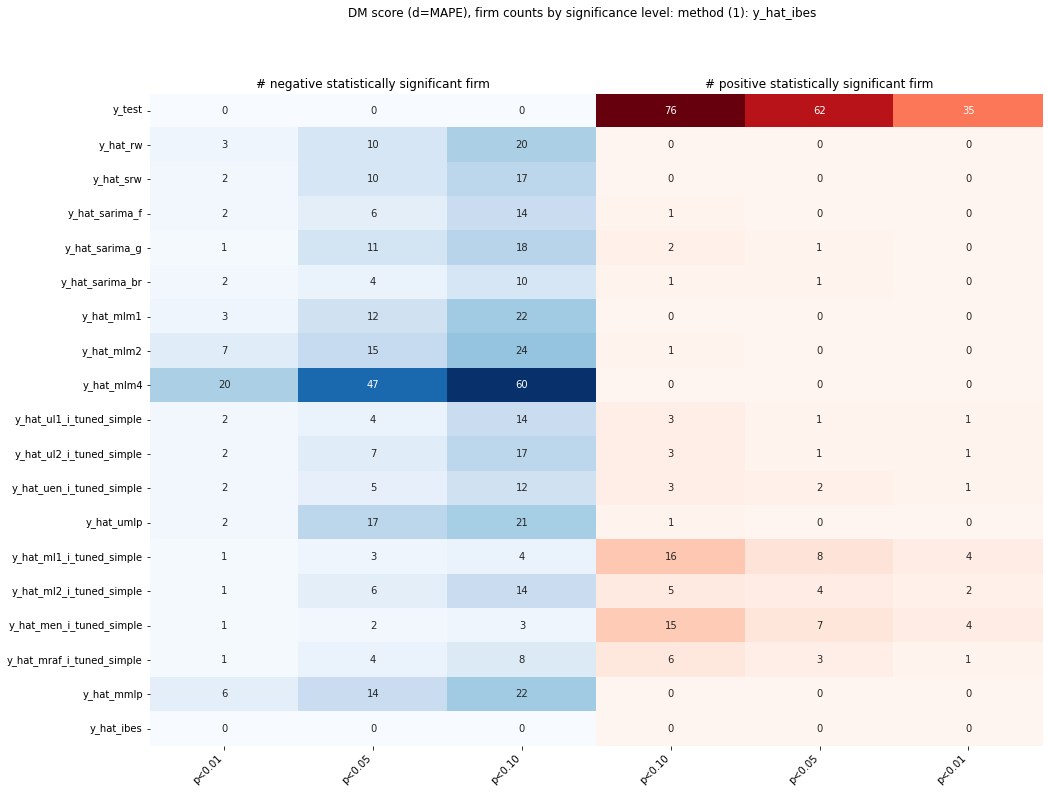

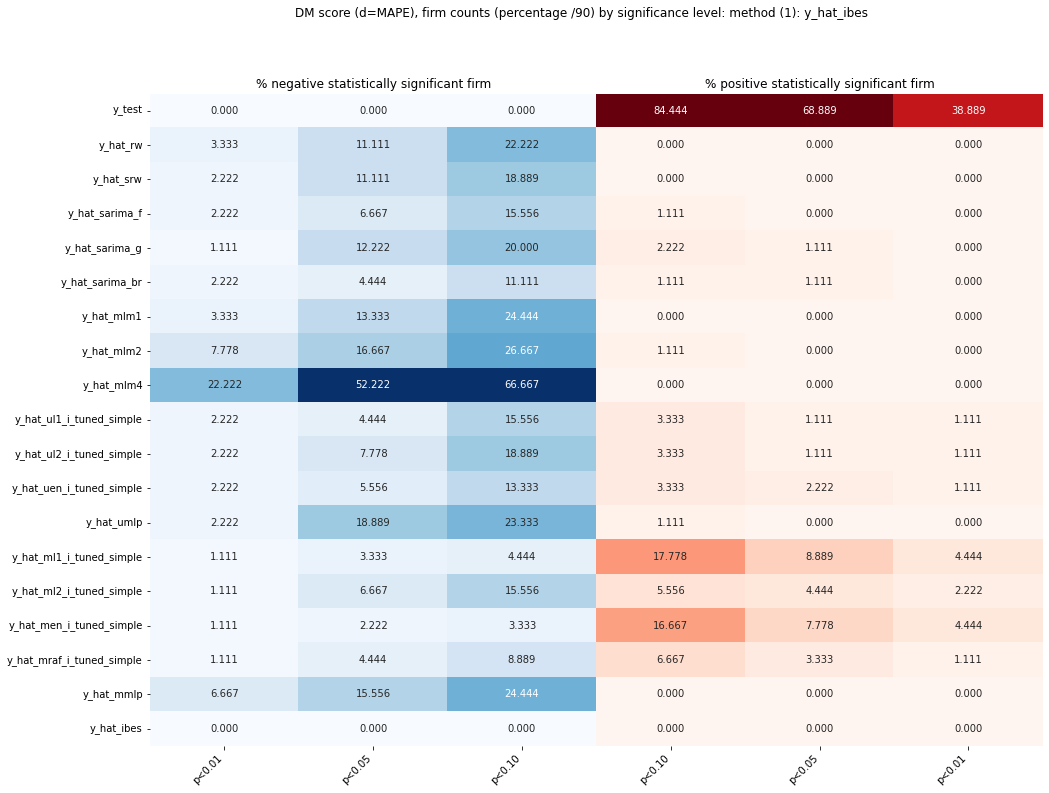

In [54]:
# plot count heatmap 
num_firm = len(y_hats_all_vsibes.index.get_level_values(0).unique())

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))#, dpi=300)

sns.heatmap(dm_test_p_count_ibes[["p_1n", "p_5n", "p_10n"]].values, cmap='Blues', ax=axs[0], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, cbar_kws={})
sns.heatmap(dm_test_p_count_ibes[["p_10p", "p_5p", "p_1p"]].values, cmap='Reds', ax=axs[1], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=False)

fig.suptitle("DM score (d=MAPE), firm counts by significance level: method (1): " + m1)
axs[0].set_title("# negative statistically significant firm")
axs[0].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"], rotation=45, ha='right')
axs[1].set_title("# positive statistically significant firm")
axs[1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"], rotation=45, ha='right')

yticks = [x.split()[-1] for x in dm_test_p_count_ibes.index]
axs[0].set_yticklabels(labels=yticks, rotation=0, ha='right')

fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

# plot count (percentage) heatmap 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))#, dpi=300)

sns.heatmap(dm_test_p_count_ibes[["p_1n", "p_5n", "p_10n"]].values * (1/num_firm) * 100, cmap='Blues', ax=axs[0], vmax=50, vmin=0, annot=True, fmt=".3f", cbar=False, cbar_kws={})
sns.heatmap(dm_test_p_count_ibes[["p_10p", "p_5p", "p_1p"]].values * (1/num_firm) * 100, cmap='Reds', ax=axs[1], vmax=50, vmin=0, annot=True, fmt=".3f", cbar=False, yticklabels=False)

fig.suptitle("DM score (d=MAPE), firm counts (percentage /" + str(num_firm) + ") by significance level: method (1): " + m1)
axs[0].set_title("% negative statistically significant firm")
axs[0].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"], rotation=45, ha='right')
axs[1].set_title("% positive statistically significant firm")
axs[1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"], rotation=45, ha='right')

yticks = [x.split()[-1] for x in dm_test_p_count_ibes.index]
axs[0].set_yticklabels(labels=yticks, rotation=0, ha='right')

fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

# Time Series Plot

検定的にはIBESよりもLasso, ENが勝ってる企業が多い

In [155]:
# IBESのMAPEがLASSOよりも統計的有意に大きいような企業
dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"][(dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"]["DM"] > 0) & (dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"]["p_value"] < 0.1)]

,DM,p_value,sig_level
index,,,
アドバンテスト,3.616128,0.004054,0.01
アルプスアルパイン,2.077402,0.061976,0.10
エフピコ,5.326275,0.000242,0.01
カプコン,6.764345,0.000031,0.01
キーエンス,2.757053,0.018654,0.05
スクウェア・エニックス・ホール,1.831957,0.094147,0.10
ダイキン工業,1.974858,0.073916,0.10
ディスコ,2.935041,0.013568,0.05
トヨタ紡織,2.237281,0.046924,0.05


アドバンテスト


[]

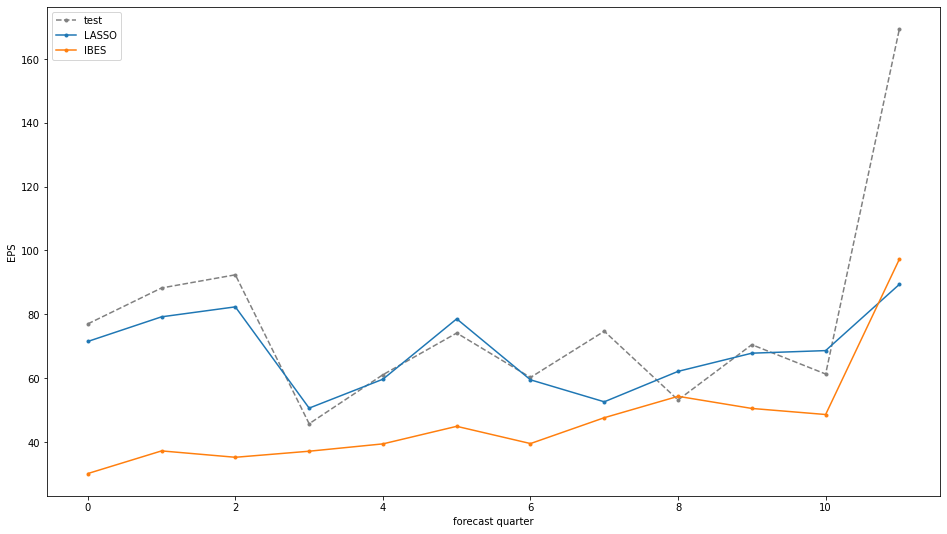

In [162]:
plot_firm = "アドバンテスト"
print(plot_firm)
plt.figure(figsize=(16, 9))
plt.plot(y_hats_all_vsibes.loc[plot_firm]["y_test"].values, marker=".", color="gray", linestyle="--", label="test")

method_1 = "y_hat_ml1_i_tuned_simple"
plt.plot(y_hats_all_vsibes.loc[plot_firm][method_1].values, marker=".", label="LASSO")

method_2 = "y_hat_ibes"
plt.plot(y_hats_all_vsibes.loc[plot_firm][method_2].values, marker=".", label="IBES")

plt.xlabel("forecast quarter")
plt.ylabel("EPS")
plt.legend()
plt.plot()

In [159]:
# IBESのMAPEがLASSOよりも統計的有意に小さいような企業
dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"][(dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"]["DM"] < 0) & (dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"]["p_value"] < 0.1)]

,DM,p_value,sig_level
index,,,
パナソニック,-5.433443,0.000206,0.01
マツダ,-2.837210,0.016162,0.05
日本製鉄,-2.167842,0.052976,0.10
東京製鉄,-2.210544,0.049172,0.05


パナソニック


[]

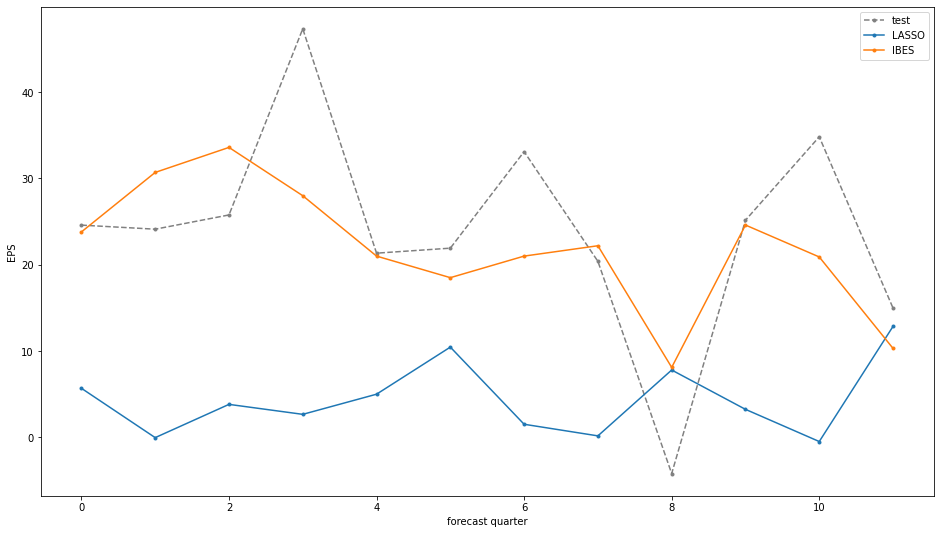

In [163]:
plot_firm = "パナソニック"
print(plot_firm)
plt.figure(figsize=(16, 9))
plt.plot(y_hats_all_vsibes.loc[plot_firm]["y_test"].values, marker=".", color="gray", linestyle="--", label="test")

method_1 = "y_hat_ml1_i_tuned_simple"
plt.plot(y_hats_all_vsibes.loc[plot_firm][method_1].values, marker=".", label="LASSO")

method_2 = "y_hat_ibes"
plt.plot(y_hats_all_vsibes.loc[plot_firm][method_2].values, marker=".", label="IBES")

plt.xlabel("forecast quarter")
plt.ylabel("EPS")
plt.legend()
plt.plot()

In [55]:
# IBESのMAPEがLASSOと統計的有意に差がない企業
dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"][(dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"]["p_value"] > 0.1)]

,DM,p_value,sig_level
index,,,
いすゞ自動車,0.936433,0.369154,not stat sig
アイシン,1.341709,0.206731,not stat sig
アステラス製薬,1.333475,0.209331,not stat sig
アズビル,-0.101199,0.921213,not stat sig
アリアケジャパン,-0.179118,0.861101,not stat sig
...,...,...,...
関西ペイント,-0.699383,0.498835,not stat sig
ＪＦＥホールディングス,-0.563492,0.584404,not stat sig
ＪＳＲ,1.201300,0.254862,not stat sig


いすゞ自動車


[]

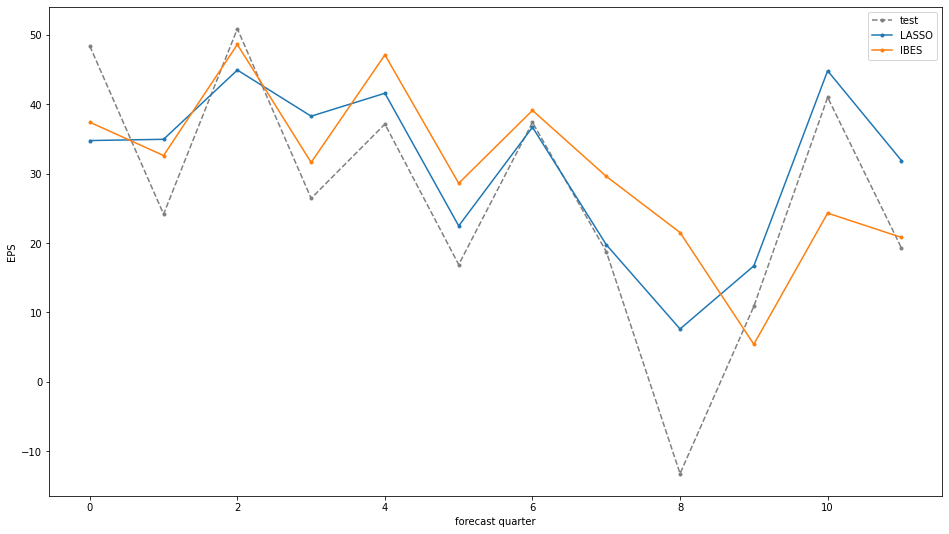

In [57]:
plot_firm = "いすゞ自動車"
print(plot_firm)
plt.figure(figsize=(16, 9))
plt.plot(y_hats_all_vsibes.loc[plot_firm]["y_test"].values, marker=".", color="gray", linestyle="--", label="test")

method_1 = "y_hat_ml1_i_tuned_simple"
plt.plot(y_hats_all_vsibes.loc[plot_firm][method_1].values, marker=".", label="LASSO")

method_2 = "y_hat_ibes"
plt.plot(y_hats_all_vsibes.loc[plot_firm][method_2].values, marker=".", label="IBES")

plt.xlabel("forecast quarter")
plt.ylabel("EPS")
plt.legend()
plt.plot()